In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import GridSearchCV
import seaborn as sns

model_class=LogisticRegression

df = pd.read_csv('Data/Glass.csv')
df_tar = df['Target']
df = df.drop('Target', axis=1)
df = (df - df.min()) / (df.max() - df.min())
df['bias'] = 1

In [8]:
X_train, X_test = pd.DataFrame(), pd.DataFrame()
for tr_val in df_tar.unique():
    train, test = train_test_split(df[df_tar==tr_val], test_size=0.15, random_state=45)
    X_train=pd.concat([train,X_train])
    X_test= pd.concat([test, X_test])
y_train=df_tar[df_tar.index.isin(X_train.index)]
y_test=df_tar[df_tar.index.isin(X_test.index)]

In [9]:
param_grid = {
    RandomForestClassifier: {
        'n_estimators': [50, 100, 150, 300, 500],
        'max_depth': [2, 5, 10, 20, 30, 35, 40, 45, 50],
        'bootstrap': [True, False]
    },
    LogisticRegression: {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
    },
    DecisionTreeClassifier: {
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    }
}[model_class]
grid_search = GridSearchCV(estimator=model_class(), param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

E:\User Applications\Software\Miniconda3\envs\SpikingJelly\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
E:\User Applications\Software\Miniconda3\envs\SpikingJelly\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\User Applications\Software\Miniconda3\envs\SpikingJelly\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\User Applications\Software\Miniconda3\envs\SpikingJelly\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\User Applications\Software\Miniconda3\envs\SpikingJelly\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The 

{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


E:\User Applications\Software\Miniconda3\envs\SpikingJelly\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\User Applications\Software\Miniconda3\envs\SpikingJelly\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\User Applications\Software\Miniconda3\envs\SpikingJelly\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\User Applications\Software\Miniconda3\envs\SpikingJelly\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\User Applications\Software\Miniconda3\envs\SpikingJelly\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reac

In [10]:
model=model_class(**grid_search.best_params_)
model.fit(X_train, y_train)
pred=model.predict(X_test)

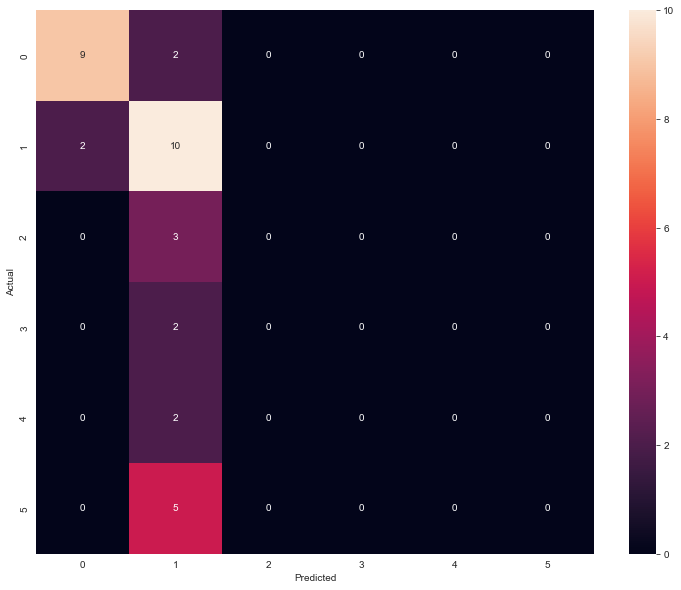

In [11]:
cm=confusion_matrix(y_test, pred)
s = sns.heatmap(cm, annot=True, vmin=0)
s.set(xlabel="Predicted", ylabel="Actual")
plt.gcf().set_size_inches(12.5, 10)
plt.show(s)

In [12]:
scores=cross_val_score(model, df, df_tar, cv=10)
scores.mean()

E:\User Applications\Software\Miniconda3\envs\SpikingJelly\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


0.5051948051948052